# Spike-Triggered Average, Part 2

Yesterday, we explored the concept of the spike-triggered average and you got some experience creating your own from random data. Today, we are going to extend this discussion by shifting towards real data, using the H1 neuron dataset.

The H1.mat file in this lab contains data collected from de Ruyter van Stevenick from a fly's H1 visual neuron responding to a white noise visual motion. Data were sampled at 500 Hz (in other words, $\Delta t = 2ms$). 

Within the file, $rho$ is a boolean vector indicating spike times (1 = spike, 0 = no spike), and $stim$ indicates the intensity of the stimulus (in this case, the horizontal speed of moving dots).

The fly has two H1 neurons, one in each hemisphere, and they are located in the Lobula plate in the diagram above. These neurons are very large making them easy to record from. Why are they called H1 neurons? Because they detect movement in the horizontal direction!

Run the cell below to load the data.

In [1]:
# Importing packages to load data
import scipy.io as sio

# Load the file and parse the variables
H1 = sio.loadmat('H1.mat')
rho = H1['rho']
stim = H1['stim']

# Making them one dimensional to do further calculations
rho = rho[:,0]
stim = stim[:,0]

Plot the first 1000 points of the stim vector versus time to see how the stimulus randomly varies across time. Remember that the recording was done at 500 Hz.

Text(0, 0.5, 'Horizontal velocity')

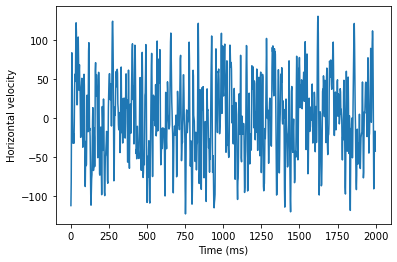

In [6]:
import numpy as np
import matplotlib.pyplot as plt

timeVector = np.arange(0, len(rho)*2, 2)
plt.plot(timeVector[0:1000], stim[0:1000])
plt.xlabel("Time (ms)")
plt.ylabel("Horizontal velocity")

Although you will be calculating the STA yourself in lab, today I am providing it to you in a file. The first line  reads in the file. Complete the rest of the plotting code to plot the STA over time.

Text(0, 0.5, 'Horizontal velocity')

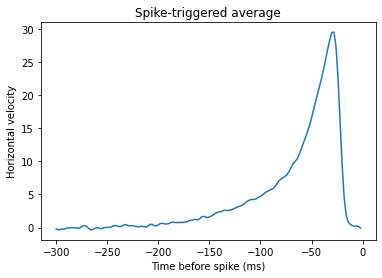

In [7]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

# load the data
STA = np.load('STA.npy')

# create the time vector from -300 to 0 in steps of 2
timeVec = np.arange(-300,0,2)

# create the plot
plt.figure()
plt.plot(timeVec, STA)
plt.title('Spike-triggered average')
plt.xlabel("Time before spike (ms)") # fill me in
plt.ylabel("Horizontal velocity") # fill me in

In your readings for today, you learned that if you convolve the STA with the stimulus, you can approximate the firing rate. Let's try that here using the fast and easy **np.convolve()** function. I recommend using the "same" method. Call the resulting vector approxFiringRate.

In [8]:
approxFiringRate = np.convolve(stim, STA, 'same')

Right now, your new variable is continuous, while the spike train (rho) is binary. We will be creating a binary spike train tomorrow. In the meantime, fill in the code below to plot the second 1000 points of rho and the second 1000 points of your approximated firing rate. Is your approximated rate higher when your neuron was actually spiking more? 

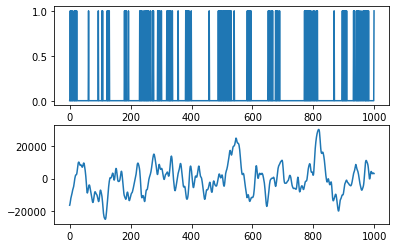

In [12]:
xAxis = np.arange(1000)

plt.figure()
plt.subplot(2,1,1)
plt.plot(xAxis, rho[1000:2000]) # fill in brackets
plt.subplot(2,1,2)
plt.plot(xAxis, approxFiringRate[1000:2000]) # fill in brackets

Let's go the other way and work to reconstruct the stimulus. Convolve the spike-triggered average with the spike train (rho). Call your resulting variable stimReconstruct. As before, fill in the code snippet below to plot the second 1000 points of the stimulus and the second 1000 points of the stimulus reconstruction.

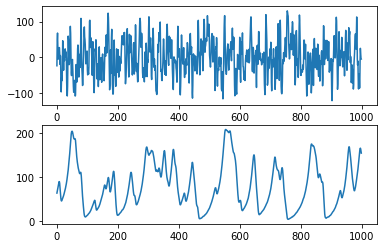

In [13]:
# convolve the STA with the spike train
stimReconstruct = np.convolve(rho, STA, 'same')

xAxis = np.arange(1000)

# fill in figure below
plt.figure()
plt.subplot(2,1,1)
plt.plot(xAxis, stim[1000:2000]) # fill in brackets
plt.subplot(2,1,2)
plt.plot(xAxis, stimReconstruct[1000:2000]) # fill in brackets

We can check the overall stimilarity of the stimulus and its reconstruction using correlation. The Pearson correlation coefficient is implemented in **np.corrcoef()**. The output of this function is a 2x2 matrix showing the correlations between all variables. Because we are not interested in the correlation between any variable and itself, the coefficient value we want is stored in the first row, second column of the matrix.

In [15]:
# compute the correlation between stim and stimReconstruct
c = np.corrcoef(stim, stimReconstruct)

# extract the coefficient from the first row and second column
print(c[0, 1])
print(c)

0.00493677889489828
[[1.         0.00493678]
 [0.00493678 1.        ]]


Nice work today! Please upload this work to Lyceum.